In [1]:
import os
import sys

os.environ["PIXEDFIT_HOME"] = "/nvme/scratch/work/tharvey/piXedfit/"
from matplotlib import pyplot as plt
from ResolvedGalaxy import ResolvedGalaxy

# Change dpi to make plots larger

plt.rcParams["figure.dpi"] = 100

# Disable tex in matplotlib

plt.rcParams["text.usetex"] = False

%matplotlib inline

Running on Morgan.


In [2]:
from piXedfit.utils.filtering import list_filters

filters = list_filters()

2mass_h
2mass_j
2mass_k
akari_n160
akari_n60
akari_wide_l
akari_wide_s
alma_b3_2945
alma_b5_1288
alma_b6_1140
alma_b6_1199
alma_band4
alma_band6
cfht_mega_g
cfht_mega_i
cfht_mega_r
cfht_mega_u
cfht_mega_z
cfht_wircam_h
cfht_wircam_j
cfht_wircam_ks
euclid_h
euclid_j
euclid_vis
euclid_y
galex_fuv
galex_nuv
herschel_pacs_100
herschel_pacs_160
herschel_pacs_70
herschel_spire_250
herschel_spire_350
herschel_spire_500
hsc_g
hsc_i
hsc_nb1010
hsc_nb387
hsc_nb816
hsc_nb921
hsc_r
hsc_y
hsc_z
hst_acs_f435w
hst_acs_f475w
hst_acs_f555w
hst_acs_f606w
hst_acs_f625w
hst_acs_f775w
hst_acs_f814w
hst_acs_f850lp
hst_nicmos_f110w
hst_nicmos_f160w
hst_wfc3_ir_f105w
hst_wfc3_ir_f110w
hst_wfc3_ir_f125w
hst_wfc3_ir_f140w
hst_wfc3_ir_f160w
hst_wfc3_uvis2_f225w
hst_wfc3_uvis2_f275w
hst_wfc3_uvis2_f336w
hst_wfc3_uvis_f225w
hst_wfc3_uvis_f275w
hst_wfc3_uvis_f336w
hst_wfc3_uvis_f350lp
hst_wfc3_uvis_f390w
hst_wfpc2_f300w
hst_wfpc2_f336w
hst_wfpc2_f450w
hst_wfpc2_f555w
hst_wfpc2_f606w
hst_wfpc2_f702w
hst_wfpc2_f814w


In [3]:
# galaxy = ResolvedGalaxy.init_from_galfind(2506, 'JOF', 'v11')#, excl_bands = ['F435W', 'F775W', 'F850LP'])
# galaxy.dump_to_h5()

galaxy = ResolvedGalaxy.init(5371, "JOF", "v11")
%matplotlib inline
# galaxy = ResolvedGalaxy.init(2506, 'JOF', 'v11')

Loading from .h5
dvipng not found, disabling LaTeX


In [4]:
print(galaxy.psf_kernels)

{'star_stack': {'F090W': array([[-5.14060254e-06, -3.73899174e-07,  1.27253073e-05, ...,
        -4.91638610e-06,  3.14939234e-06,  2.40351794e-05],
       [-2.61469380e-05, -8.14925510e-06, -6.44448234e-07, ...,
        -1.59756778e-06,  1.71895305e-07,  4.95683957e-06],
       [-1.39859475e-05,  1.06309981e-05, -3.50735140e-06, ...,
         7.90871990e-06,  4.58273605e-06,  2.11401659e-06],
       ...,
       [-7.68529310e-06,  1.59057481e-06,  6.44994967e-06, ...,
         1.06535642e-05,  2.03316909e-06,  2.71841043e-05],
       [ 1.96087433e-06,  1.55765354e-05,  5.48021849e-06, ...,
         7.74266505e-06,  3.77129968e-06,  2.24551175e-05],
       [-3.63761024e-06,  7.12836749e-06,  1.38103862e-06, ...,
        -5.01061817e-06, -8.93332400e-06,  9.09513993e-06]]), 'F115W': array([[-6.12097457e-06,  4.63885164e-06,  1.40674167e-05, ...,
        -1.52423692e-06,  1.17773745e-05,  2.57089576e-05],
       [-2.60783196e-05, -5.17070495e-07,  1.12995590e-06, ...,
         4.86668327e

In [5]:
galaxy.get_webbpsf(plot=False, overwrite=False)

Webbpsf PSFs already calculated
Saving to run pypher


KeyError: 'webbpsf'

added to  <HDF5 file "JOF_2506.h5" (mode r+)> meta rms_background


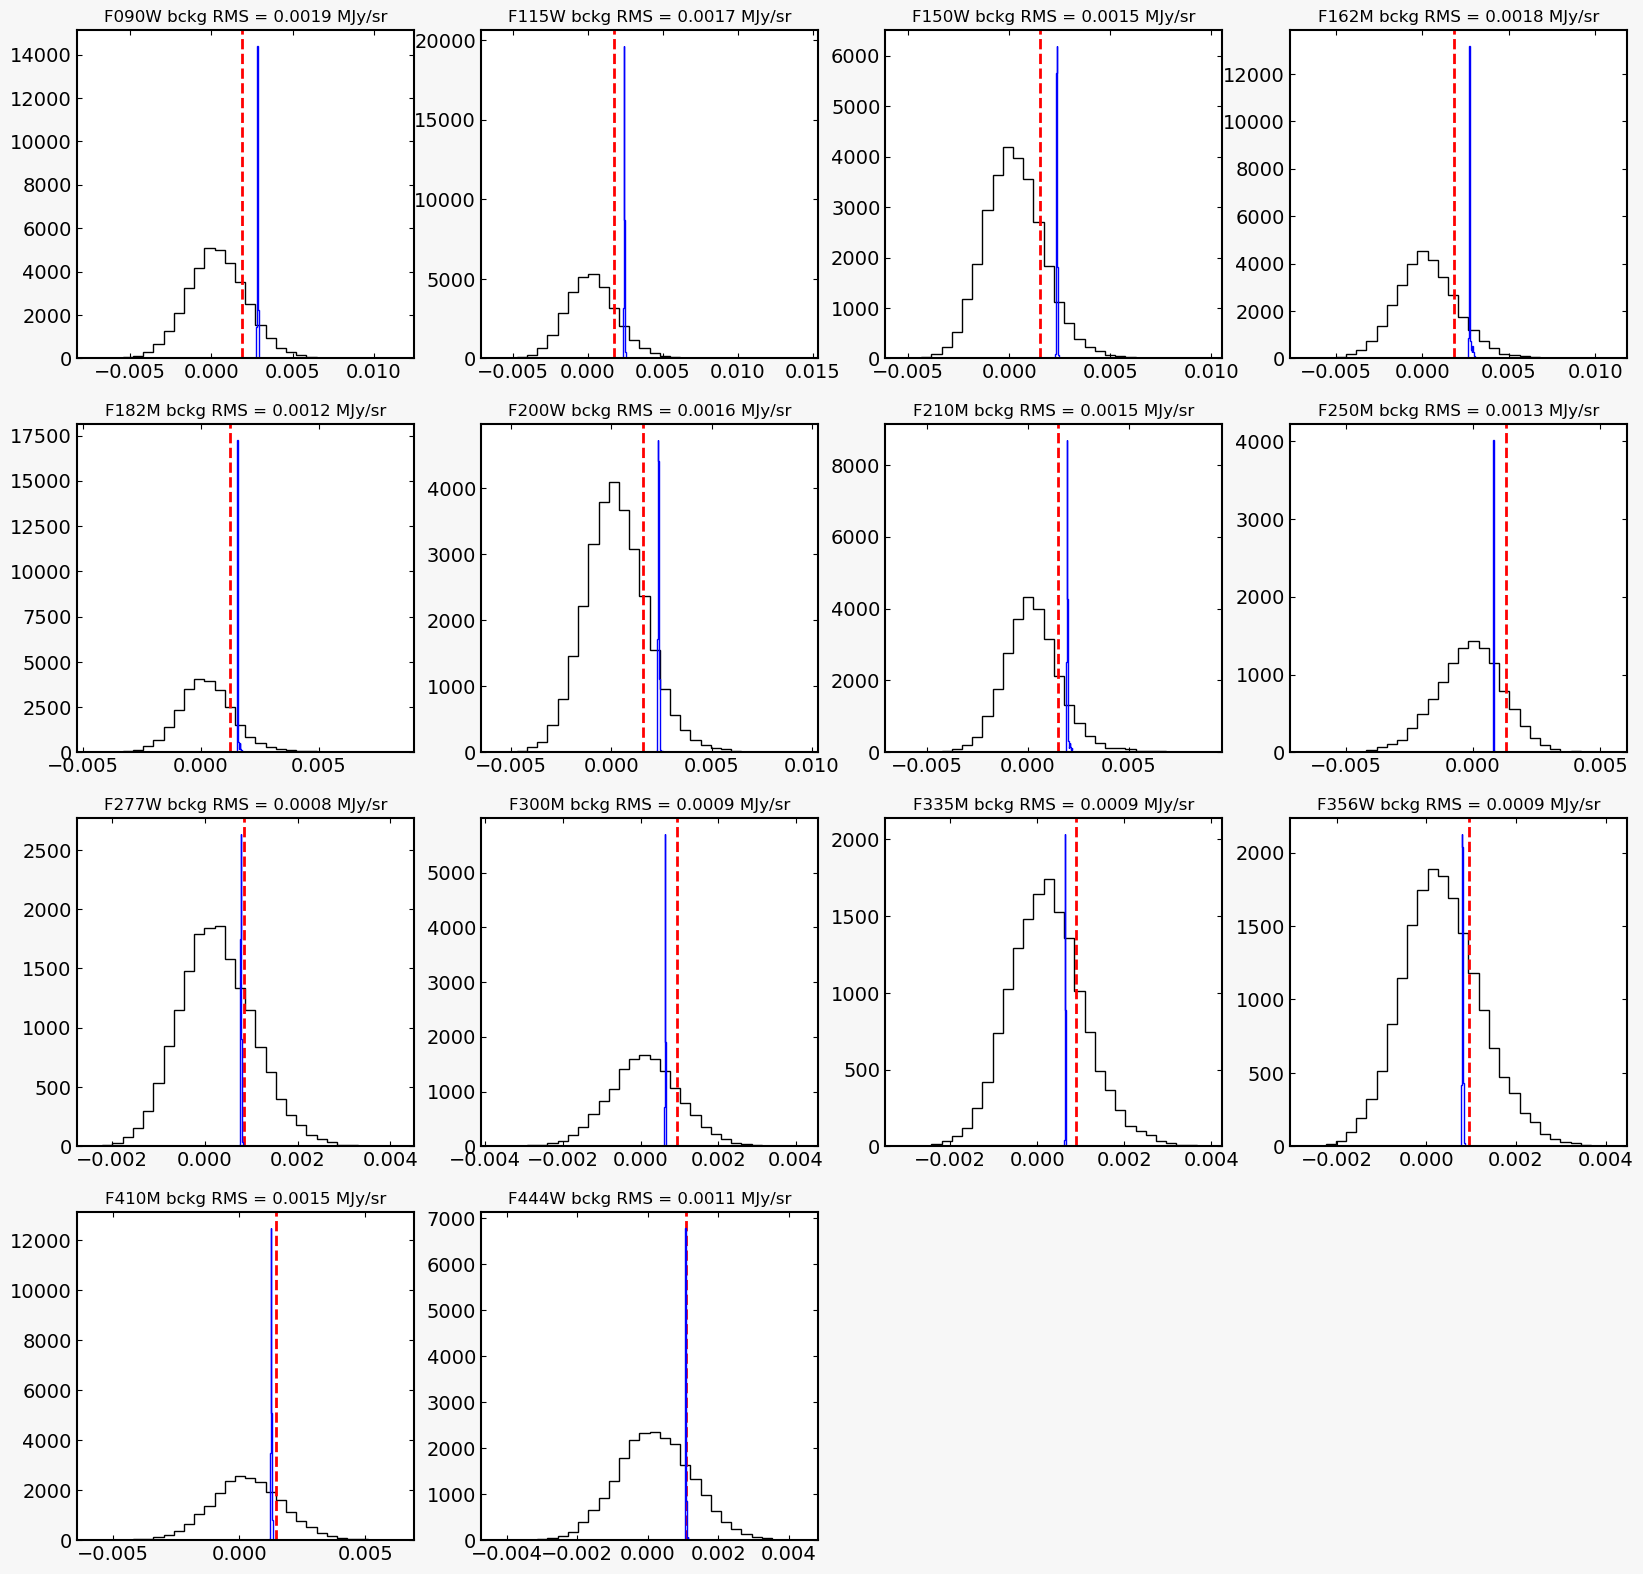

In [ ]:
galaxy.estimate_rms_from_background(plot=True)
plt.show()

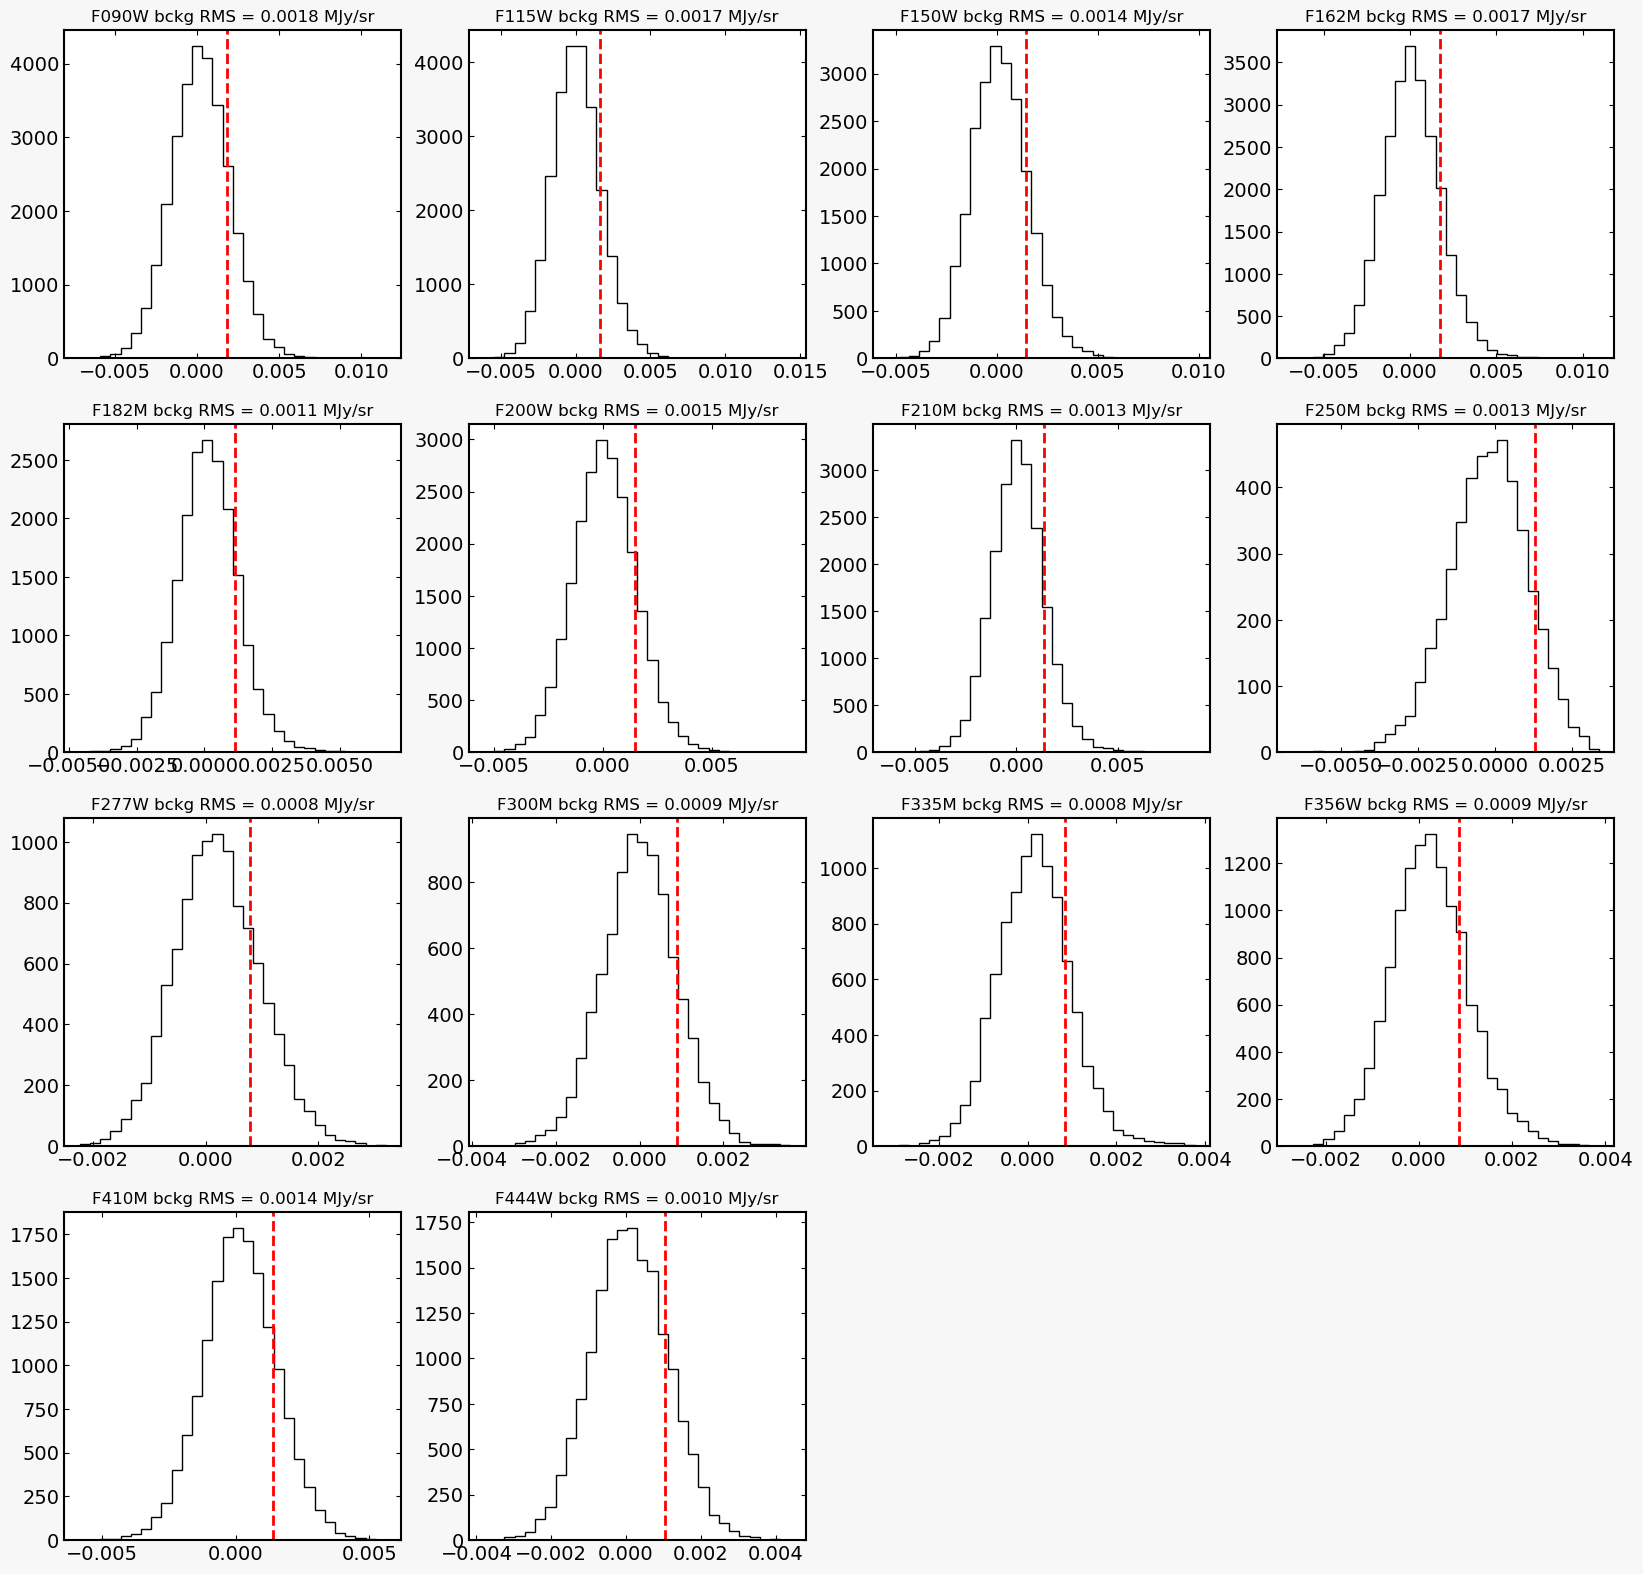

In [ ]:
galaxy.estimate_rms_from_background(plot=True, object_distance=30)
plt.show()

In [ ]:
img_processing = galaxy.pixedfit_processing(
    seg_combine=["F277W", "F356W", "F444W"], use_galfind_seg=True
)

produce stamp_crop_crop_F435W_sci.fits
produce stamp_crop_crop_F435W_var.fits
produce stamp_crop_crop_F606W_sci.fits
produce stamp_crop_crop_F606W_var.fits
produce stamp_crop_crop_F775W_sci.fits
produce stamp_crop_crop_F775W_var.fits
produce stamp_crop_crop_F814W_sci.fits
produce stamp_crop_crop_F814W_var.fits
produce stamp_crop_crop_F090W_sci.fits
produce stamp_crop_crop_F090W_var.fits
produce stamp_crop_crop_F850LP_sci.fits
produce stamp_crop_crop_F850LP_var.fits
produce stamp_crop_crop_F115W_sci.fits
produce stamp_crop_crop_F115W_var.fits
produce stamp_crop_crop_F150W_sci.fits
produce stamp_crop_crop_F150W_var.fits
produce stamp_crop_crop_F162M_sci.fits
produce stamp_crop_crop_F162M_var.fits
produce stamp_crop_crop_F182M_sci.fits
produce stamp_crop_crop_F182M_var.fits
produce stamp_crop_crop_F200W_sci.fits
produce stamp_crop_crop_F200W_var.fits
produce stamp_crop_crop_F210M_sci.fits
produce stamp_crop_crop_F210M_var.fits
produce stamp_crop_crop_F250M_sci.fits
produce stamp_crop_crop

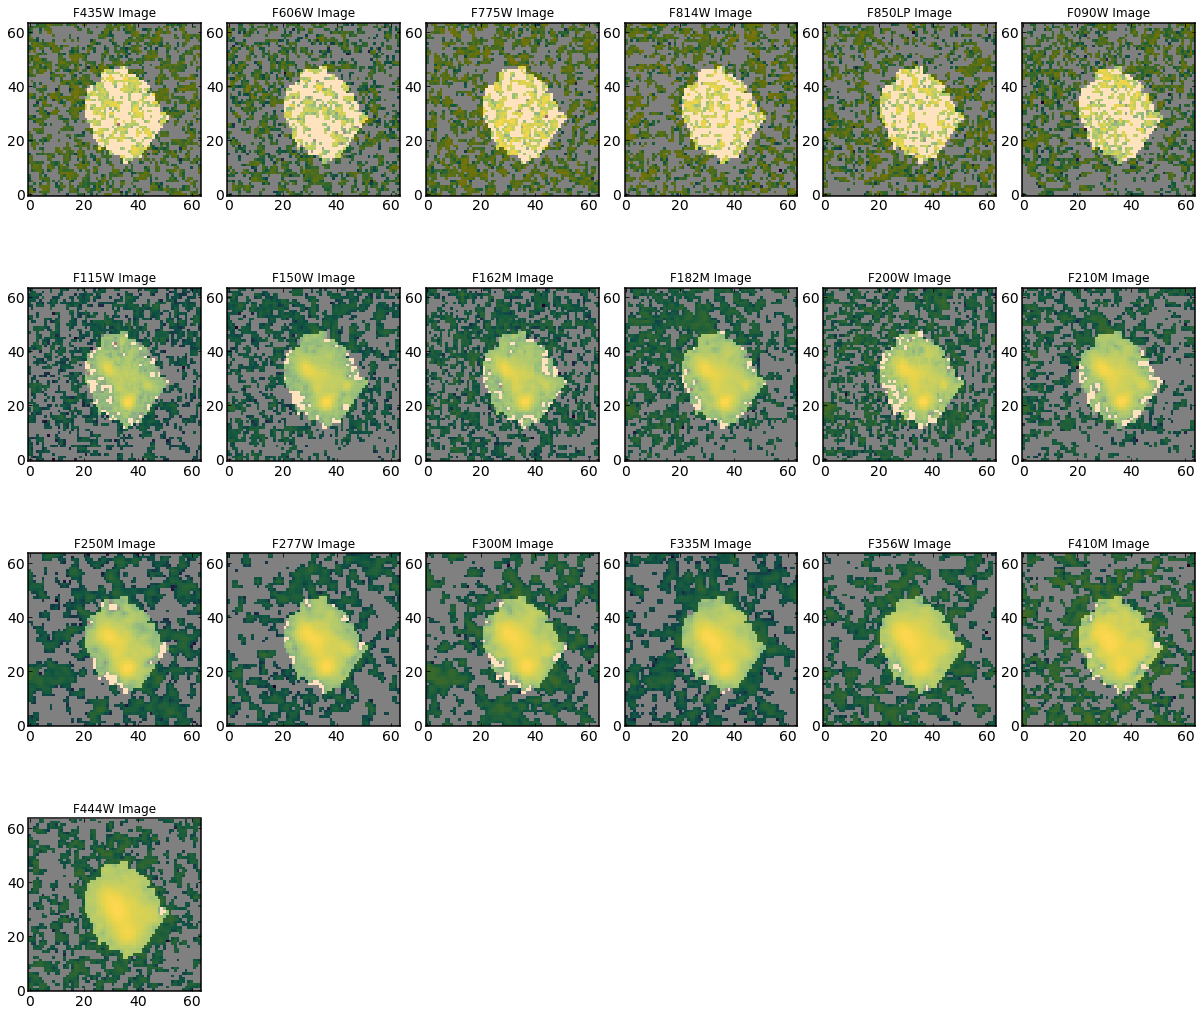

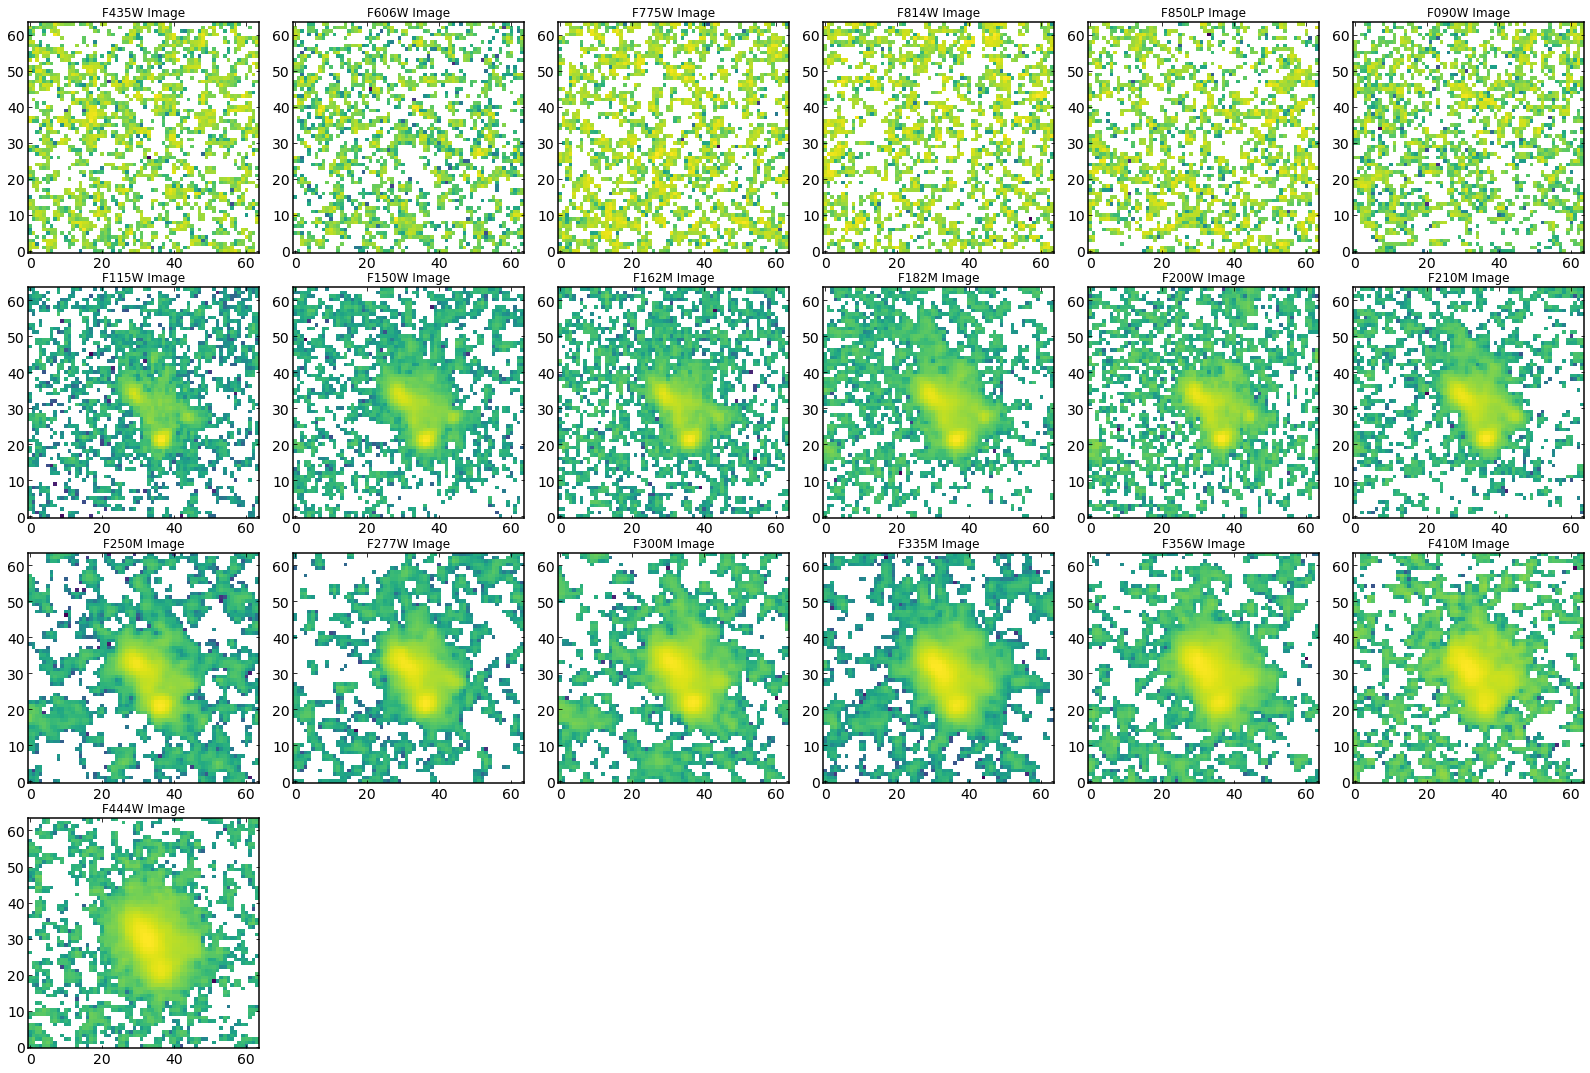

In [ ]:
galaxy.plot_image_stamps()

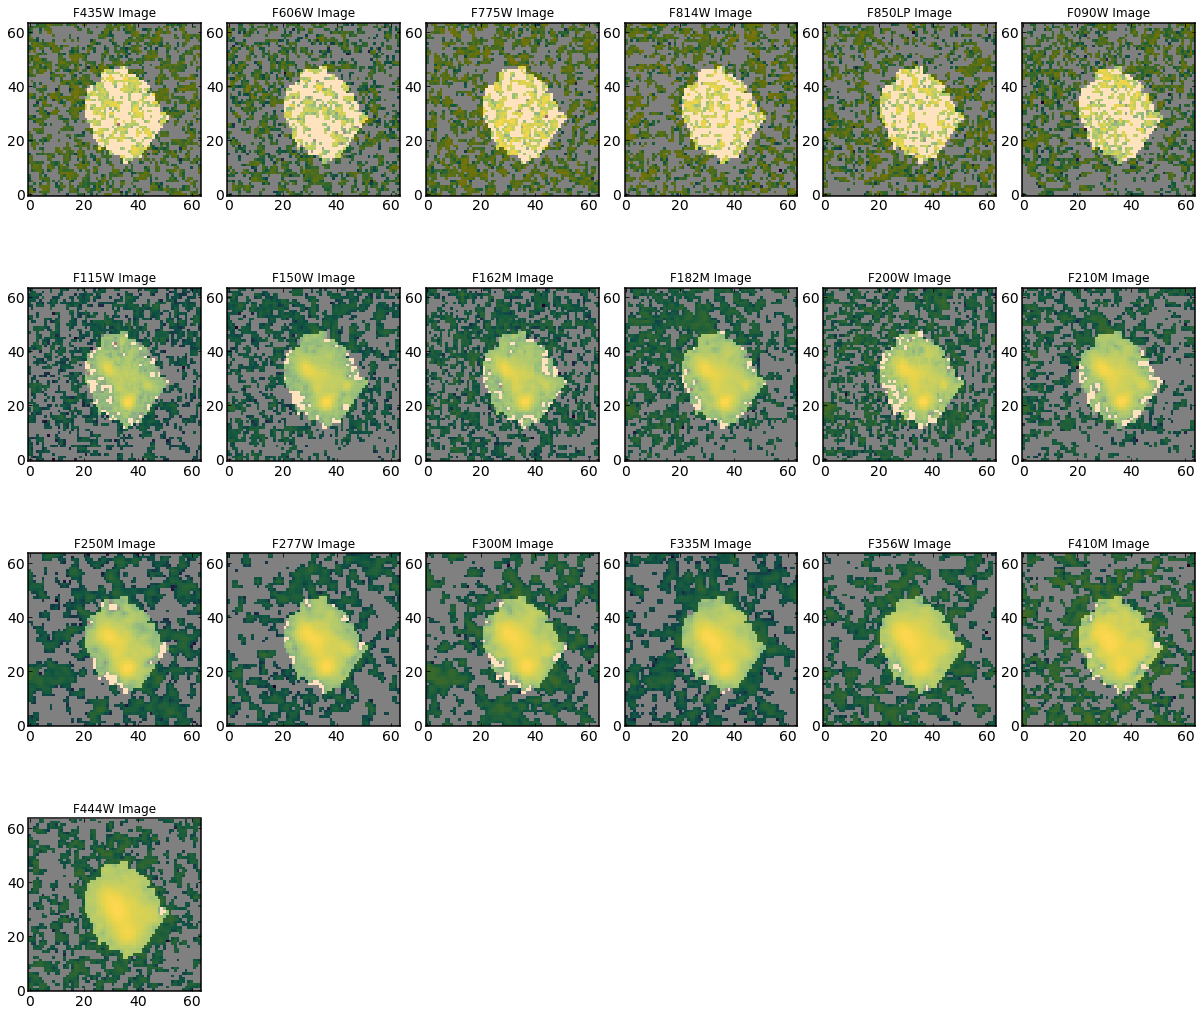

In [ ]:
galaxy.plot_gal_region()

['F435W', 'F606W', 'F775W', 'F814W', 'F850LP', 'F090W', 'F115W', 'F150W', 'F162M', 'F182M', 'F200W', 'F210M', 'F250M', 'F277W', 'F300M', 'F335M', 'F356W', 'F410M', 'F444W']


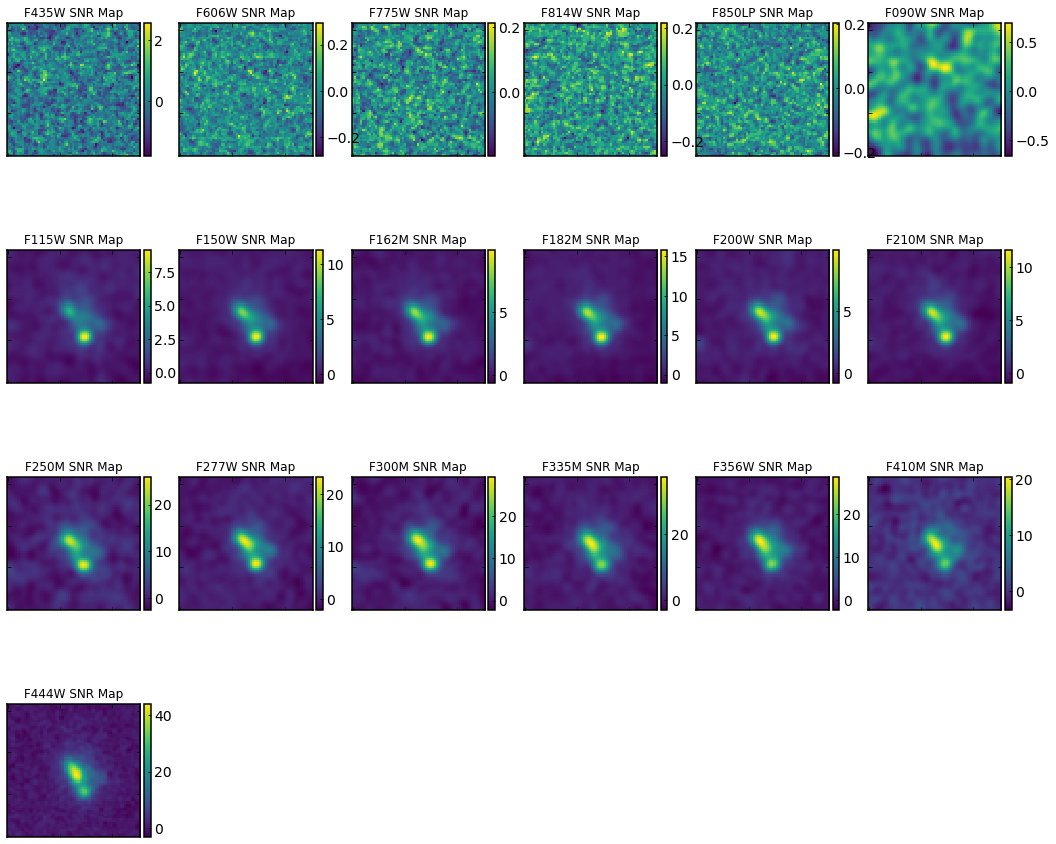

In [ ]:
galaxy.plot_snr_map()

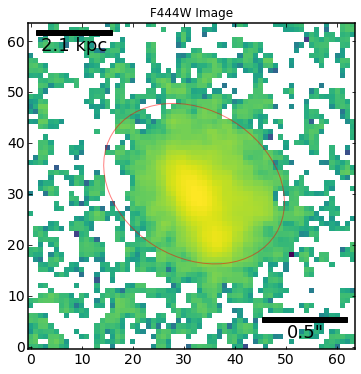

In [ ]:
galaxy.plot_image_stamp("F444W")

In [ ]:
galaxy.pixedfit_plot_map_fluxes()

ValueError: No flux map found. Run pixedfit_processing() first

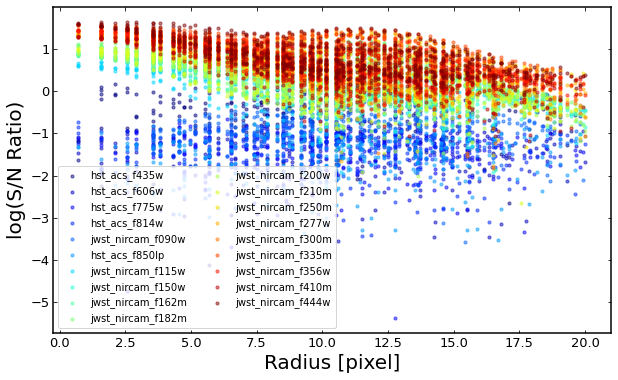

In [ ]:
galaxy.pixedfit_plot_radial_SNR()
plt.show()

Bins: 13 ==> accumulated pixels: 326/722

Bins: 16 ==> accumulated pixels: 722/722
Number of bins: 16
added to  <HDF5 file "JOF_5371.h5" (mode r+)> bin_maps pixedfit
added to  <HDF5 file "JOF_5371.h5" (mode r+)> bin_fluxes pixedfit
added to  <HDF5 file "JOF_5371.h5" (mode r+)> bin_flux_err pixedfit


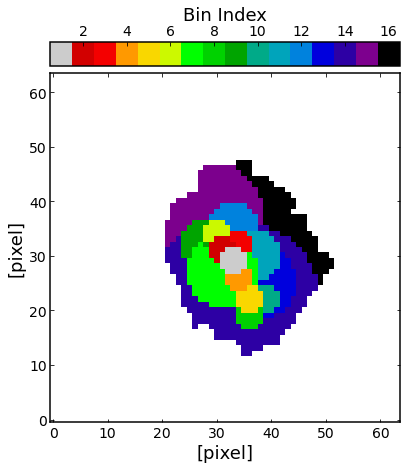

In [ ]:
%matplotlib inline
galaxy.pixedfit_binning(SNR_reqs=10, ref_band="F444W", min_band="F115W", overwrite=True)
galaxy.pixedfit_plot_binmap()

In [ ]:
tab = galaxy.measure_flux_in_bins()

tab

ID,F435W,F435W_err,F606W,F606W_err,F775W,F775W_err,F814W,F814W_err,F850LP,F850LP_err,F090W,F090W_err,F115W,F115W_err,F150W,F150W_err,F162M,F162M_err,F182M,F182M_err,F200W,F200W_err,F210M,F210M_err,F250M,F250M_err,F277W,F277W_err,F300M,F300M_err,F335M,F335M_err,F356W,F356W_err,F410M,F410M_err,F444W,F444W_err
,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32
1,-0.0001498294954875191,0.00015227577809847885,-0.0001879367840158908,0.0012906807187811748,0.00016448811234481597,0.001926866167457637,-0.00011924504994685515,0.0007598357930090583,-3.942354729988931e-06,0.0009396345912665403,5.2404878418739537e-05,0.00024947420946663476,0.003374502615632299,0.00022904995934456217,0.005873369210857003,0.00022889115650287658,0.006619818779070042,0.0002601297498902568,0.006362558494840815,0.0001518584846317136,0.006339553940121536,0.00023003916832655397,0.006173207096619115,0.0001904692933296539,0.006563477521993085,8.523005200338902e-05,0.007272538553424811,9.20492671874109e-05,0.006763527959388489,6.886926675996124e-05,0.011285469058214839,7.857009411986459e-05,0.0095312423587872,9.089385423429777e-05,0.009953220072338703,0.00013214873782670255,0.021550341473373154,0.0001205958251375705
2,0.00010678071463229952,0.00012636097915340633,0.00015510435821508575,0.0010094941613692009,-4.141748492743531e-05,0.001606740061842676,4.893345346747284e-05,0.0006288439312060254,-6.990100085226488e-05,0.0007652066241110051,-0.0001368268813701924,0.00020180172188240657,0.0028073988376833216,0.00018772852859235727,0.0050391378987453325,0.0001880657840445141,0.005452260659219805,0.00021370541108309661,0.005362092884781861,0.00012518348540975572,0.005211662541968725,0.00018865860357964096,0.005082893797018657,0.00015692119661019034,0.005431117999063134,7.038731325840984e-05,0.005528538368122797,7.556128001364917e-05,0.005087140155575756,5.672115869541012e-05,0.007918063869330045,6.499670883919334e-05,0.0072888113705382555,7.572668065911853e-05,0.006766258135942936,0.00010630693507186353,0.012464124769185382,9.852740913629532e-05
3,-0.00010994872443374476,0.00010834212148427544,0.00017773850654876256,0.0009808422833112733,-2.2655165109176015e-05,0.0014418770400773248,2.3889538307195387e-05,0.0005813471919075663,-2.4097986207918315e-05,0.0007078792419486109,3.764328376461153e-06,0.0001883942334321081,0.0019425561553654352,0.00017367743094456395,0.0032043217238074003,0.00017245735184278127,0.0034118744262969934,0.00019609576606727805,0.0033692202853054733,0.00011490617373782763,0.0036249692061582294,0.0001747753030194755,0.003418588953535754,0.0001437141631038181,0.0028530960692882733,6.412258325433409e-05,0.0036015593540621943,6.8453549882477e-05,0.0037031644918751327,5.1896547953907684e-05,0.00466926560600274,5.763967667248227e-05,0.003919655292493569,6.674931602297543e-05,0.003971834313137678,9.545396516653123e-05,0.007162861214480407,8.706084918230772e-05
4,9.616425827288689e-05,0.0001195938430562083,-0.00020395440056125895,0.0010714449528413312,5.5690592309667456e-05,0.0016594218462143654,2.767475263361157e-06,0.0006375502708535251,-2.3865523645799525e-05,0.0007981439249841629,0.0001104355837238655,0.00021228849231375642,0.002649474461504785,0.00019439580829518877,0.003889984066626773,0.00019327143451446763,0.004198385595608,0.00021845550869767637,0.003705784615093533,0.0001273660404974367,0.003638492227061628,0.00019275972095760511,0.0034718405360873706,0.00015932971277166265,0.0037331632907452606,7.1628300826861e-05,0.0038903125686007398,7.69278547270141e-05,0.003599745589139866,5.7162835990559865e-05,0.00552352012566528,6.414703258534205e-05,0.0048

In [ ]:
galaxy.provide_bagpipes_phot(1)

galaxy.provide_bagpipes_phot(8)

Using star_stack PSF and pixedfit binning derived fluxes


array([[-1.30326684e-04,  1.18383242e-04],
       [-2.88514143e-04,  1.04595897e-03],
       [ 1.72087362e-05,  1.61900347e-03],
       [ 2.59088900e-05,  6.47167001e-04],
       [-1.22771443e-04,  7.97555836e-04],
       [ 6.35659732e-05,  2.10904419e-04],
       [ 2.88855340e-03,  1.95564737e-04],
       [ 3.44068143e-03,  1.91855051e-04],
       [ 3.50031573e-03,  2.15913689e-04],
       [ 1.75316344e-04,  1.26953047e-04],
       [ 2.74981418e-03,  1.89963682e-04],
       [ 2.87372656e-03,  1.58466931e-04],
       [ 1.97164976e-04,  7.12598173e-05],
       [ 1.36822881e-04,  7.39331545e-05],
       [ 1.26459309e-04,  5.61840334e-05],
       [ 2.02920099e-04,  6.33267927e-05],
       [ 1.51995379e-04,  7.14878169e-05],
       [ 1.33876326e-04,  1.04076786e-04],
       [ 2.79002335e-04,  9.48125526e-05]])

In [ ]:
# Simple test Bagpipes fit_instructions

sfh = {
    "age_max": (0.03, 0.5),  # Gyr
    "age_min": (0, 0.5),  # Gyr
    "metallicity": (1e-3, 2.5),  # solar
    "massformed": (4, 12),  # log mstar/msun
}

nebular = {}
nebular["logU"] = -2.0

dust = {}
dust["type"] = "Calzetti"
dust["Av"] = (0, 5.0)

fit_instructions = {
    "t_bc": 0.01,
    "constant": sfh,
    "nebular": nebular,
    "dust": dust,
}
meta = {"run_name": "initial_test_cnst_sfh"}

overall_dict = {"meta": meta, "fit_instructions": fit_instructions}

galaxy.run_bagpipes(overall_dict)

Fixing redshift to 8.316405296325684
Starting dense_basis. please wait ~ a minute for the FSPS backend to initialize.
Bagpipes: PyMultiNest import failed, fitting will use the Nautilus sampler instead.
Beginning fit
{'t_bc': 0.01, 'constant': {'age_max': (0.03, 0.5), 'age_min': (0, 0.5), 'metallicity': (0.001, 2.5), 'massformed': (4, 12)}, 'nebular': {'logU': -2.0}, 'dust': {'type': 'Calzetti', 'Av': (0, 5.0)}, 'redshift': 8.316405}
MultiNest not available. Switching to nautilus.

Bagpipes: fitting object 1


Completed in 118.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
constant:age_max               0.091      0.182      0.355
constant:age_min               0.001      0.016      0.045
constant:massformed            7.109      7.263      7.410
constant:metallicity           0.009      0.042      0.278
dust:Av                        0.017      0.0

In [ ]:
%matplotlib inline
a = galaxy.plot_bagpipes_results("initial_test_cnst_sfh", reload_from_cat=True)

None


Starting dense_basis. please wait ~ a minute for the FSPS backend to initialize.
Bagpipes: PyMultiNest import failed, fitting will use the Nautilus sampler instead.
Using custom style
No catalog provided. Output will be limited.
Changed directory to /nvme/scratch/work/tharvey/resolved_sedfitting


FileNotFoundError: /nvme/scratch/software/anaconda3/envs/tharvey_galfind/lib/python3.10/site-packages/bagpipes//Users/user/Documents/PhD/bagpipes_dir/inputs/filters//F435W_LePhare.txt not found.

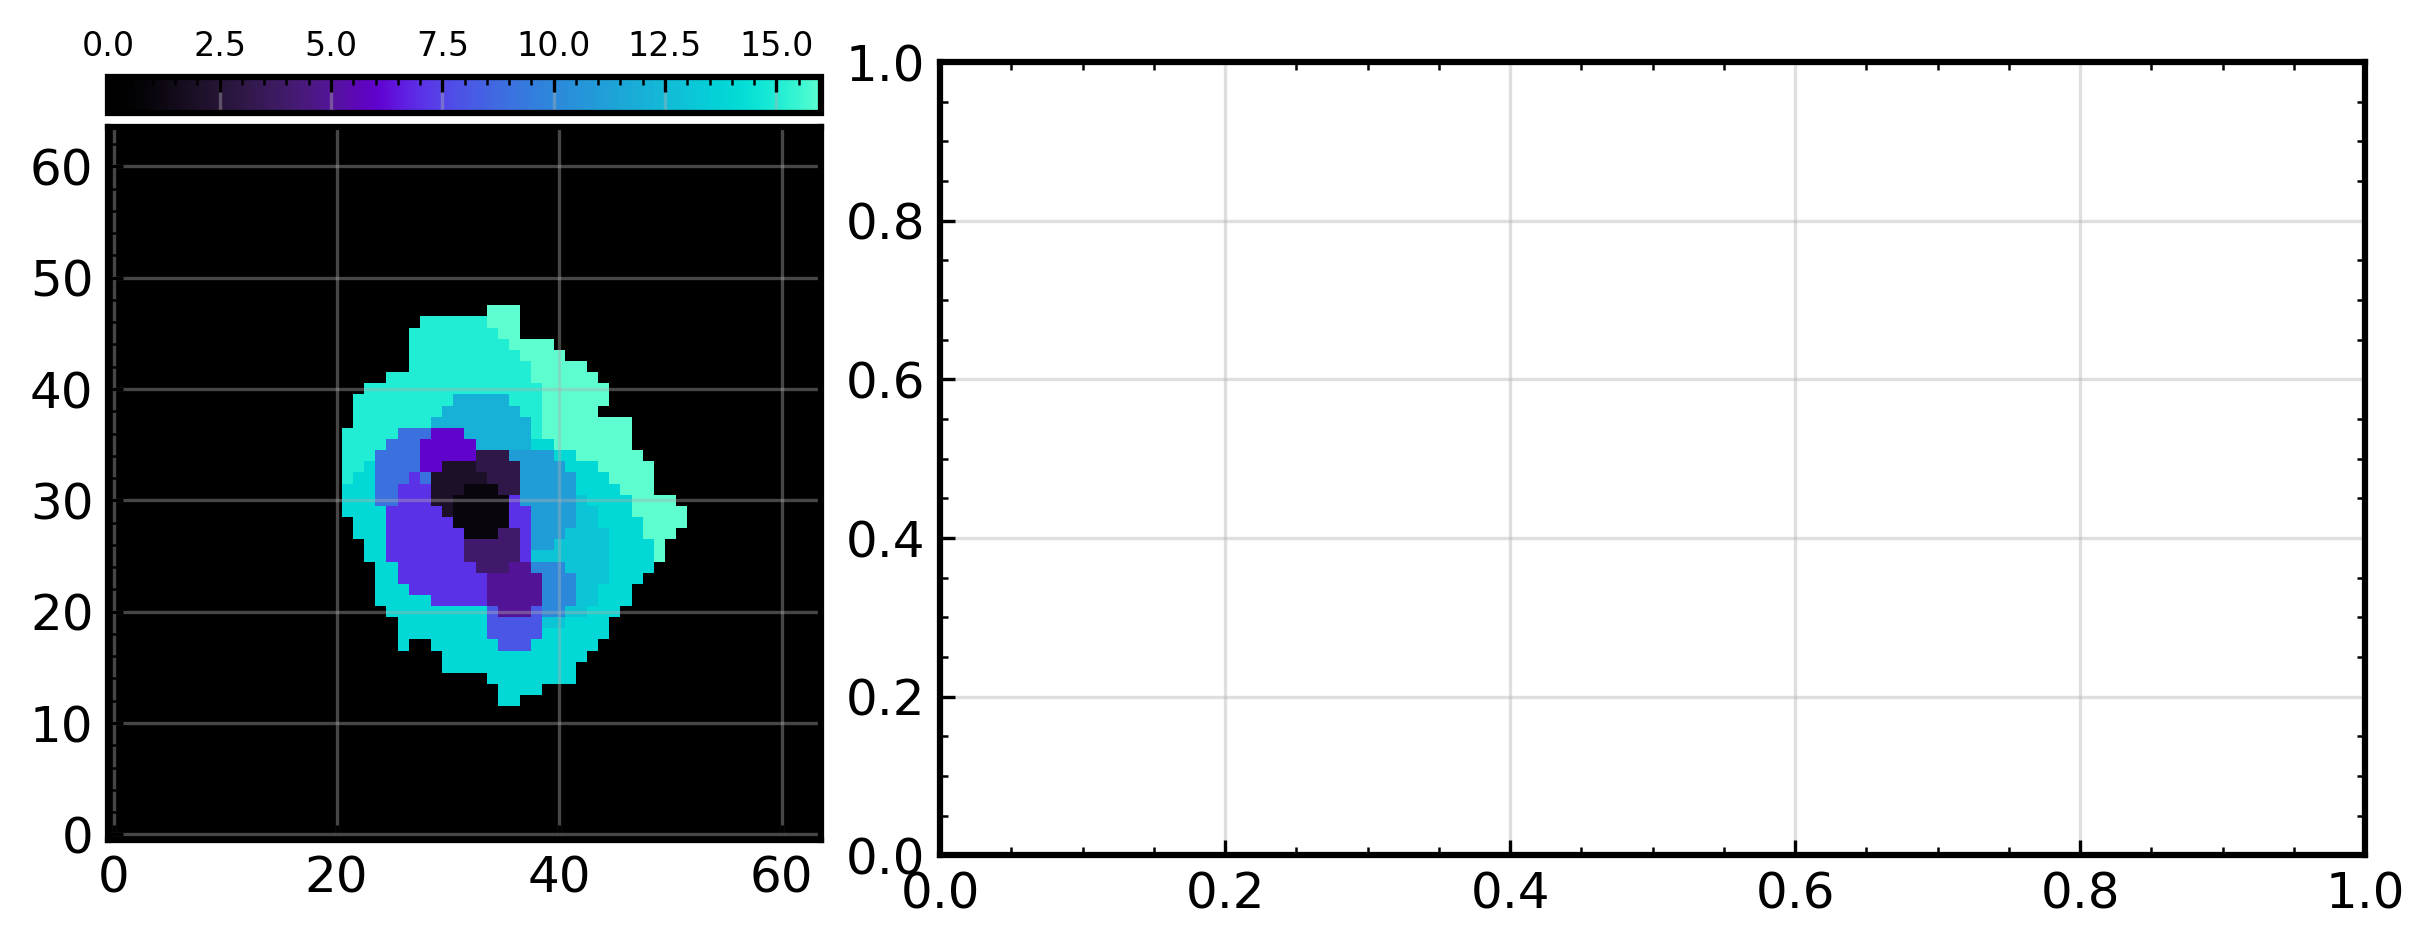

In [ ]:
galaxy.plot_bagpipes_sed("initial_test_cnst_sfh")

In [ ]:
sys.path.insert(1, "/nvme/scratch/work/tharvey/bagpipes")

Starting dense_basis. please wait ~ a minute for the FSPS backend to initialize.
Bagpipes: PyMultiNest import failed, fitting will use the Nautilus sampler instead.
Using custom style
